In [119]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv(r'D:\farm_data\farm_production_dataset.csv')
df

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
0,1908,AB,Barley,15.00,1585.0,84000.0,129800.0,53000.0,1296
1,1908,AB,Flaxseed,29.00,950.0,1900.0,5900.0,2000.0,56
2,1908,AB,Oats,18.00,1675.0,352000.0,519400.0,210000.0,6316
3,1908,AB,"Rye, all",23.00,1665.0,5000.0,6500.0,3000.0,117
4,1908,AB,Sugar beets,0.55,18100.0,38100.0,5200.0,2100.0,208
...,...,...,...,...,...,...,...,...,...
10268,1984,SK,Tame hay,78.00,2870.0,2087000.0,1800000.0,728000.0,162786
10269,1984,SK,"Wheat, all",176.00,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.00,1200.0,1633000.0,3350000.0,1356000.0,307004
10271,1984,SK,"Wheat, spring",175.00,1460.0,9607000.0,16300000.0,6596000.0,1681225


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10273 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10273 non-null  int64  
 1   GEO                                     10273 non-null  object 
 2   Type of crop                            10272 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9873 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10273 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 722.4+ KB


In [4]:
df.isnull().sum()

REF_DATE                                    0
GEO                                         0
Type of crop                                1
Average farm price (dollars per tonne)     30
Average yield (kilograms per hectare)      27
Production (metric tonnes)                 28
Seeded area (acres)                       400
Seeded area (hectares)                    426
Total farm value (dollars)                  0
dtype: int64

In [5]:
df['REF_DATE'].value_counts().head(10)

REF_DATE
1954    276
1984    166
1983    166
1982    162
1981    162
1980    153
1979    153
1976    143
1969    141
1970    141
Name: count, dtype: int64

In [6]:
df['GEO'].value_counts()

GEO
CA     1305
ON     1169
MA     1104
AB     1045
SK      957
QU      952
PP      845
BC      714
NS      630
NB      616
PEI     524
MP      409
NL        2
          1
Name: count, dtype: int64

In [7]:
df[df['GEO']==" "]

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
1541,1921,,Barley,34.0,1860.0,6700.0,8800.0,3600.0,230


In [8]:
df['GEO'] = df['GEO'].str.replace(" ", "ON",regex=True)

In [9]:
df['Type of crop'].isnull().sum()

1

In [10]:
df['Type of crop']=df['Type of crop'].fillna(df['Type of crop'].mode()[1])

In [11]:
df['Type of crop'].value_counts()

Type of crop
Oats                                   925
Barley                                 924
Tame hay                               924
Wheat, all                             924
Mixed grains                           914
Corn for silage                        832
Rye, all                               718
Peas, dry                              655
Flaxseed                               572
Buckwheat                              436
Sugar beets                            377
Beans, all dry (white and coloured)    352
Corn for grain                         294
Rye, fall remaining                    292
Rye, spring                            248
Canola (rapeseed)                      218
Sunflower seed                         158
Wheat, spring                          143
Mustard seed                           128
Wheat, winter remaining                106
Soybeans                                93
Wheat, durum                            24
Lentils                                 1

In [12]:
df['Average farm price (dollars per tonne)'].isnull().sum()

30

In [13]:
Q1=df['Average farm price (dollars per tonne)'].quantile(0.25)
Q3=df['Average farm price (dollars per tonne)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)
df[(df['Average farm price (dollars per tonne)']<lower_bound)| (df['Average farm price (dollars per tonne)']>upper_bound)]

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
944,1916,CA,"Beans, all dry (white and coloured)",199.0,855.0,11200.0,32500.0,13100.0,2228
971,1916,NB,"Beans, all dry (white and coloured)",230.0,1000.0,100.0,200.0,100.0,23
981,1916,NS,"Beans, all dry (white and coloured)",195.0,1335.0,400.0,800.0,300.0,78
991,1916,ON,"Beans, all dry (white and coloured)",197.0,790.0,8600.0,27000.0,10900.0,1693
1024,1916,QU,"Beans, all dry (white and coloured)",207.0,1165.0,2100.0,4400.0,1800.0,434
...,...,...,...,...,...,...,...,...,...
10263,1984,SK,"Peas, dry",201.0,1510.0,36700.0,60000.0,24300.0,7377
10267,1984,SK,Sunflower seed,337.0,510.0,5400.0,26000.0,10500.0,1820
10269,1984,SK,"Wheat, all",176.0,1420.0,11485000.0,20000000.0,8094000.0,2026204
10270,1984,SK,"Wheat, durum",188.0,1200.0,1633000.0,3350000.0,1356000.0,307004


In [14]:
df[['Production (metric tonnes)','Average farm price (dollars per tonne)']].corr()

,Production (metric tonnes),Average farm price (dollars per tonne)
Production (metric tonnes),1.000000,0.287395
Average farm price (dollars per tonne),0.287395,1.000000


In [15]:
df = df.dropna(how='all',subset=["Average farm price (dollars per tonne)","Average yield (kilograms per hectare)",'Production (metric tonnes)','Seeded area (hectares)'],axis=0)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10246 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                10246 non-null  int64  
 1   GEO                                     10246 non-null  object 
 2   Type of crop                            10246 non-null  object 
 3   Average farm price (dollars per tonne)  10243 non-null  float64
 4   Average yield (kilograms per hectare)   10246 non-null  float64
 5   Production (metric tonnes)              10245 non-null  float64
 6   Seeded area (acres)                     9848 non-null   float64
 7   Seeded area (hectares)                  9847 non-null   float64
 8   Total farm value (dollars)              10246 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 800.5+ KB


In [17]:
df = df.dropna(how='all',subset=['Average farm price (dollars per tonne)','Production (metric tonnes)','Seeded area (hectares)'])

In [18]:
df = df[~((df['Average yield (kilograms per hectare)']==0)&(df['Production (metric tonnes)']==0)&(df['Seeded area (acres)']==0)&(df['Seeded area (hectares)']==0)&(df['Total farm value (dollars)']==0))]

In [19]:
p_d=df[df['Type of crop']=='Peas, dry']
p_d['Average farm price (dollars per tonne)'].median()
df['Average farm price (dollars per tonne)']=df['Average farm price (dollars per tonne)'].fillna(p_d['Average farm price (dollars per tonne)'].median())

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9911 entries, 0 to 10272
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   REF_DATE                                9911 non-null   int64  
 1   GEO                                     9911 non-null   object 
 2   Type of crop                            9911 non-null   object 
 3   Average farm price (dollars per tonne)  9911 non-null   float64
 4   Average yield (kilograms per hectare)   9911 non-null   float64
 5   Production (metric tonnes)              9911 non-null   float64
 6   Seeded area (acres)                     9513 non-null   float64
 7   Seeded area (hectares)                  9513 non-null   float64
 8   Total farm value (dollars)              9911 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 774.3+ KB


In [21]:
df = df[~((df['Average farm price (dollars per tonne)']==0)&(df['Average yield (kilograms per hectare)']==0)&(df['Production (metric tonnes)']==0)&(df['Seeded area (acres)'].isnull())&(df['Seeded area (hectares)'].isnull())&(df['Total farm value (dollars)']==0))]

In [22]:
df[(df['Seeded area (acres)'].isnull())|(df['Seeded area (acres)']==0)]

,REF_DATE,GEO,Type of crop,Average farm price (dollars per tonne),Average yield (kilograms per hectare),Production (metric tonnes),Seeded area (acres),Seeded area (hectares),Total farm value (dollars)
68,1908,ON,"Wheat, winter remaining",33.0,1585.0,430000.0,NaN,NaN,14060
170,1909,ON,"Wheat, winter remaining",37.0,1630.0,383000.0,NaN,NaN,14255
257,1910,NB,"Rye, all",0.0,1000.0,0.0,0.0,0.0,0
284,1910,ON,"Wheat, winter remaining",32.0,1580.0,486000.0,NaN,NaN,15362
300,1910,PEI,"Peas, dry",20.0,500.0,50.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...
10220,1984,ON,"Wheat, winter remaining",154.0,3870.0,797000.0,NaN,NaN,122738
10230,1984,PP,"Rye, fall remaining",96.0,1780.0,508000.0,NaN,NaN,48616
10236,1984,PP,"Wheat, winter remaining",156.0,1780.0,494300.0,NaN,NaN,77117
10265,1984,SK,"Rye, fall remaining",97.0,1470.0,203000.0,NaN,NaN,19691


In [23]:
def area_ach(rows):
    if pd.isna(rows['Seeded area (hectares)']) or rows['Seeded area (hectares)']==0:
        return (rows['Production (metric tonnes)']*1000)/rows['Average yield (kilograms per hectare)']
    else :
        return rows['Seeded area (hectares)']

df['Seeded area (hectares)']=df.apply(area_ach,axis=1)

In [24]:
df['Seeded area (hectares)']=df['Seeded area (hectares)'].apply(lambda x:'{:.0f}'.format(x))

In [29]:
def area_acres(rows):
    if pd.isna(rows['Seeded area (acres)']) or rows['Seeded area (acres)']==0:
        return rows['Seeded area (hectares)']*2.47105
    else :
        return rows['Seeded area (acres)']

df['Seeded area (acres)']=df.apply(area_acres,axis=1)

In [27]:
df['Seeded area (hectares)']= df['Seeded area (hectares)'].astype(float)

In [ ]:
df.info()

In [33]:
df['Seeded area (acres)']=df['Seeded area (acres)'].apply(lambda x :'{:.0f}'.format(x))

In [101]:
df['Seeded area (acres)']=df['Seeded area (acres)'].astype(float)

<Axes: xlabel='GEO', ylabel='Total farm value (dollars)'>

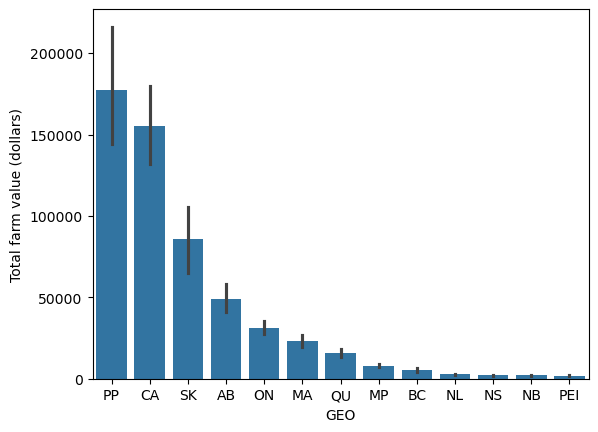

In [59]:
avg_value_geo = df.groupby('GEO')['Total farm value (dollars)'].mean().round(2).sort_values(ascending=False).index

sns.barplot(x='GEO',y='Total farm value (dollars)',data=df,estimator='mean',order=avg_value_geo)

C:\Users\acc\AppData\Local\Temp\ipykernel_19348\1851827875.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='REF_DATE',y='Total farm value (dollars)',data=df,estimator='mean',palette = 'crist',sort=False)


<Axes: xlabel='REF_DATE', ylabel='Total farm value (dollars)'>

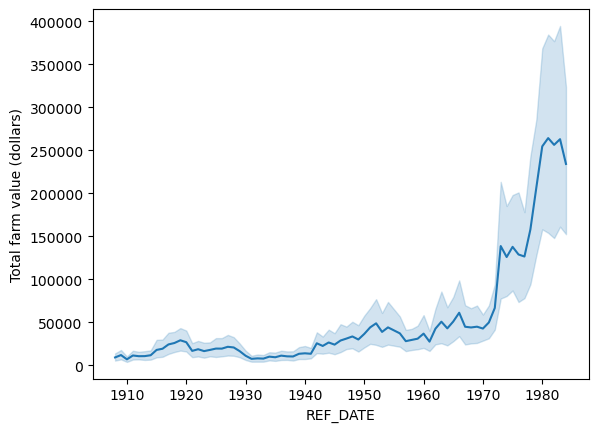

In [75]:
sns.lineplot(x='REF_DATE',y='Total farm value (dollars)',data=df,estimator='mean',palette = 'crist',sort=False)

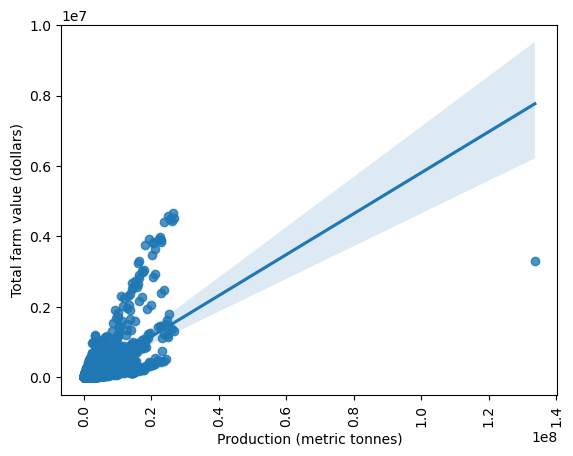

In [91]:
sns.regplot(x='Production (metric tonnes)',y='Total farm value (dollars)',data=df)
plt.xticks(rotation=90)
plt.show()

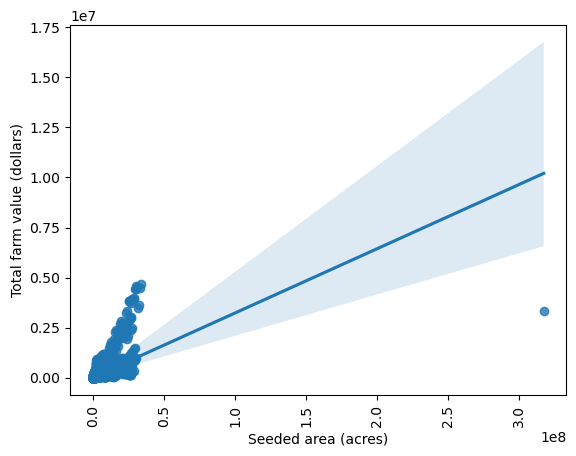

In [105]:
sns.regplot(x='Seeded area (acres)',y='Total farm value (dollars)',data=df)
plt.xticks(rotation=90)
plt.show()

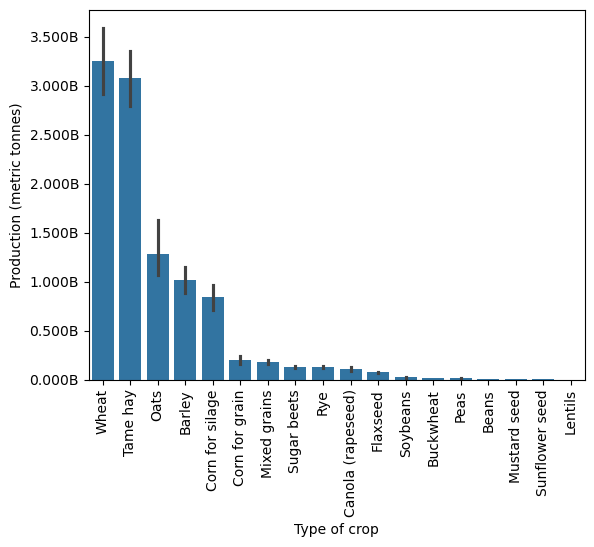

In [159]:
order =df.groupby('Type of crop')['Production (metric tonnes)'].sum().sort_values(ascending=False).index
ax = sns.barplot(x='Type of crop',y='Production (metric tonnes)',data=df,order=order,estimator='sum')
def format_billions(x, pos):
    return f'{x / 1e9:.3f}B'  # 1.3B بدلاً من 1.3e9

ax.yaxis.set_major_formatter(FuncFormatter(format_billions))

plt.xticks(rotation=90)
plt.show()

In [145]:
df['Type of crop'] = df['Type of crop'].str.replace(',.*','',regex=True)

In [149]:
df.groupby('Type of crop')['Total farm value (dollars)'].sum().sort_values(ascending=False)

Type of crop
Wheat                281296804
Tame hay              76664736
Barley                63042796
Oats                  48917713
Canola (rapeseed)     26121836
Corn for grain        18250459
Flaxseed              11050847
Mixed grains           9817572
Corn for silage        8933940
Rye                    7538776
Soybeans               4542081
Sugar beets            2873813
Beans                  1354467
Peas                   1154059
Buckwheat               852279
Mustard seed            768576
Sunflower seed          630400
Lentils                 185216
Name: Total farm value (dollars), dtype: int64

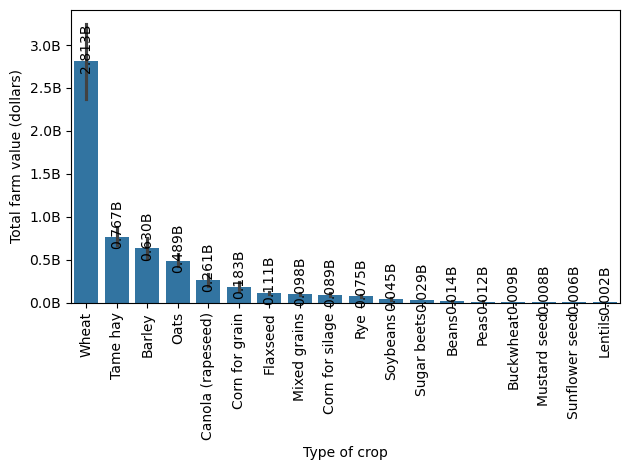

In [189]:


order = df.groupby('Type of crop')['Total farm value (dollars)'].sum().sort_values(ascending=False).index

ax = sns.barplot(x='Type of crop', y='Total farm value (dollars)', data=df, estimator='sum', order=order)

def formate_number(x, pos):
    return f'{x / 1e8}B'  
ax.yaxis.set_major_formatter(FuncFormatter(formate_number))

for p in ax.patches:
     ax.annotate(f'{p.get_height()/1e8:.3f}B', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 9), textcoords='offset points',
                rotation=90)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [203]:
count_of_crop = df.groupby(['GEO','Type of crop'])['Type of crop'].count().unstack()
count_of_crop.fillna(0,inplace=True)

In [213]:
df.to_excel('farm_data.xlsx',index=False)